In [1]:
!pip install --upgrade pip
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory='/content/drive/My Drive/Train',
                                              target_size=(150, 150),
                                              batch_size=64,
                                              class_mode='binary',
                                              shuffle=False,
                                              subset='training')

Found 3181 images belonging to 2 classes.


In [20]:
validate_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validate_generator = validate_datagen.flow_from_directory(directory='/content/drive/My Drive/Validate',
                                              target_size=(150, 150),
                                              batch_size=64,
                                              class_mode='binary',
                                              shuffle=False)

Found 404 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(directory='/content/drive/My Drive/Test',
                                              target_size=(150, 150),
                                              batch_size=64,
                                              class_mode='binary',
                                              shuffle=False)

Found 391 images belonging to 2 classes.


Epoch 1/15
50/50 [==============================] - ETA: 0s - loss: 3.0417 - accuracy: 0.3763

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 263s 5s/step - loss: 3.0417 - accuracy: 0.3763 - val_loss: 0.6909 - val_accuracy: 0.5050
Epoch 2/15
50/50 [==============================] - 229s 5s/step - loss: 0.7765 - accuracy: 0.5391 - val_loss: 0.6842 - val_accuracy: 0.4926
Epoch 3/15
50/50 [==============================] - 239s 5s/step - loss: 0.6900 - accuracy: 0.5586 - val_loss: 0.6808 - val_accuracy: 0.7649
Epoch 4/15
50/50 [==============================] - 234s 5s/step - loss: 0.7906 - accuracy: 0.6388 - val_loss: 0.6499 - val_accuracy: 0.6460
Epoch 5/15
50/50 [==============================] - 240s 5s/step - loss: 0.6279 - accuracy: 0.6790 - val_loss: 0.6198 - val_accuracy: 0.7450
Epoch 6/15
50/50 [==============================] - 228s 5s/step - loss: 0.5689 - accuracy: 0.7416 - val_loss: 0.4484 - val_accuracy: 0.8144
Epoch 7/15
50/50 [==============================] - 237s 5s/step - loss: 0.4855 - accuracy: 0.7891 - val_loss: 0.3625 - val_accuracy: 0.8639
Epoch 8/15
50/50 [======

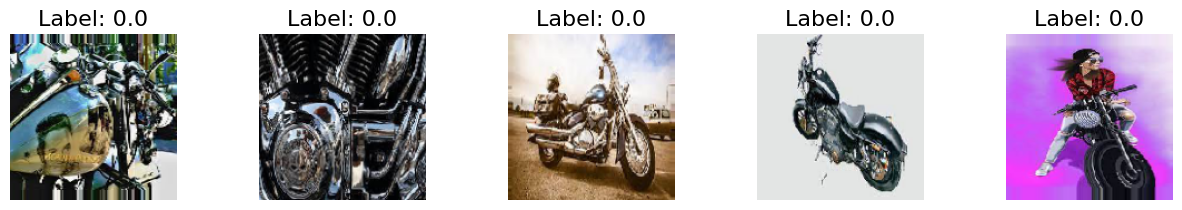

In [29]:
# Exploratory Data Analysis
def plot_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    axes = axes.ravel()
    for i in np.arange(0, 5):
        axes[i].imshow(images[i])
        axes[i].set_title(f"Label: {labels[i]}", fontsize=16)
        axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

images, labels = next(train_generator)
plot_images(images, labels)

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())  # Flatten the output of the previous layer
model.add(Dense(512, activation='relu'))  # The Dense layer should now work correctly
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_generator, epochs=15, validation_data=validate_generator)

# Plotting the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [30]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

7/7 [==============================] - 11s 1s/step


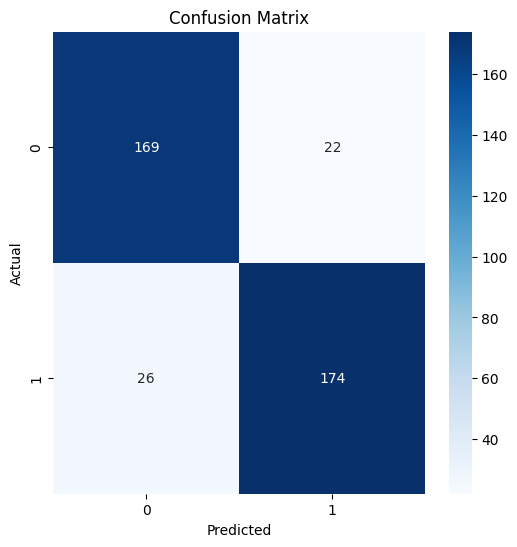

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the model predictions
predictions = model.predict(test_generator)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Get the true labels
true_labels = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predictions, target_names=['Class 0', 'Class 1'])

print(report)

              precision    recall  f1-score   support

     Class 0       0.87      0.88      0.88       191
     Class 1       0.89      0.87      0.88       200

    accuracy                           0.88       391
   macro avg       0.88      0.88      0.88       391
weighted avg       0.88      0.88      0.88       391



In [33]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 11s - loss: 0.2477 - accuracy: 0.8951 - 11s/epoch - 2s/step

Test accuracy: 0.8951406478881836


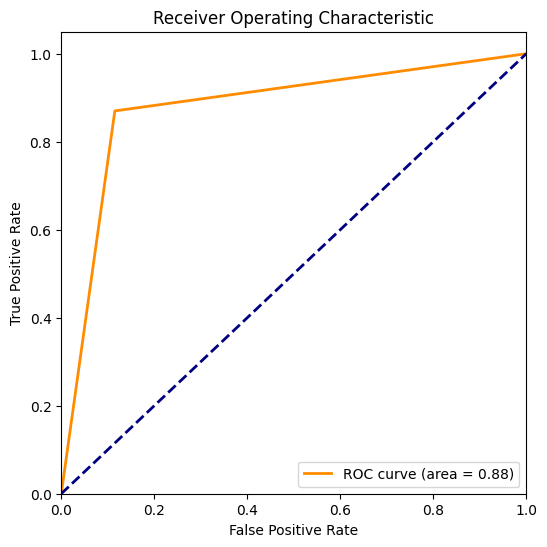

In [34]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()